In [1]:
%load_ext autoreload
%autoreload 2
import os
# 设置CUDA_VISIBLE_DEVICES环境变量为'7'
os.environ['CUDA_VISIBLE_DEVICES'] = '7'
import sys
sys.path.insert(0, '/home/user/LQ/B_Signal/Transparent_information_fusion/post/')  # 添加上一级目录到系统路径

from A1_plot_config import configure_matplotlib
configure_matplotlib(style='ieee', font_lang='en')
# %reload_ext autoreload

import os

# 修改当前工作目录
root_dir = '/home/user/LQ/B_Signal/Transparent_information_fusion/'
os.chdir(root_dir)

## load

In [2]:
from A3_load_model import load_models,predict_from_loader

# root_dir = '/home/user/LQ/B_Signal/Transparent_information_fusion/'
config_dir = 'configs/DIRG_020/config_NNSPN.yaml'
# 6
best_model_path = 'save/Attention_paper/basic/NNSPN7_noise/model-epoch=191-val_loss=0.0013-val_acc=1.0000-l1_loss=0.0000.ckpt' 


TSPN, test_dataloader,args = load_models(config_dir,best_model_path=best_model_path)

# y_true,y_pred = predict_from_loader(TSPN,test_dataloader)




/home/user/anaconda3/envs/LQ1/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Seed set to 17


Running experiment: post_time2024-07-16-15-41_lr0.001_epochs300_scale4_l1norm0.001_datasetDIRG_020_basic_seed17
# build signal processing layers
# build feature extractor layers
# build classifier


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Loading best model from save/Attention_paper/basic/NNSPN7_noise/model-epoch=191-val_loss=0.0013-val_acc=1.0000-l1_loss=0.0000.ckpt


In [ ]:
# from A4_confusion_plus_noise_task import heatmap_confusion,plot_accuracy_vs_snr
# heatmap_confusion(predictions = y_pred, test_labels = y_true, args = args,plot_dir='./plot', name='NNSPN')


In [ ]:
# from A4_confusion_plus_noise_task import heatmap_confusion,plot_accuracy_vs_snr
# y_true,y_pred = predict_from_loader(MWA.cuda(),test_dataloader)
# heatmap_confusion(predictions = y_pred, test_labels = y_true, args = args,plot_dir='./plot', name='MWA')

In [4]:
from A4_confusion_plus_noise_task import plot_accuracy_vs_snr


Resnet_condfig_dir = 'configs/DIRG_020/config_Resnet.yaml'
MWA_config_dir = 'configs/DIRG_020/config_MWA_CNN.yaml'
Sincnet_config_dir = 'configs/DIRG_020/config_Sincnet.yaml'
WKN_config_dir = 'configs/DIRG_020/config_WKN.yaml'

resnet, test_dataloader, args = load_models(Resnet_condfig_dir,best_model_path='save/Attention_paper/basic/Resnet/model-epoch=247-val_loss=0.0028-val_acc=1.0000-l1_loss=0.0000.ckpt')
MWA,_,_ = load_models(MWA_config_dir,best_model_path='save/Attention_paper/basic/CNN/model-epoch=122-val_loss=0.0024-val_acc=1.0000-l1_loss=0.0000.ckpt')
Sincnet,_,_ = load_models(Sincnet_config_dir,best_model_path='save/Attention_paper/basic/Sinc_net/model-epoch=278-val_loss=0.0013-val_acc=1.0000-l1_loss=0.0000.ckpt')
WKN,_,_ = load_models(WKN_config_dir,best_model_path='save/Attention_paper/basic/WKN/model-epoch=211-val_loss=0.0042-val_acc=1.0000-l1_loss=0.0000.ckpt')





Seed set to 17
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Running experiment: post_time2024-07-16-14-34_lr0.001_epochs300_scale4_l1norm0.001_datasetDIRG_020_basic_seed17
Loading best model from save/Attention_paper/basic/Resnet/model-epoch=247-val_loss=0.0028-val_acc=1.0000-l1_loss=0.0000.ckpt


Seed set to 17
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Running experiment: post_time2024-07-16-14-34_lr0.001_epochs300_scale4_l1norm0.001_datasetDIRG_020_basic_seed17


Seed set to 17
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Loading best model from save/Attention_paper/basic/CNN/model-epoch=122-val_loss=0.0024-val_acc=1.0000-l1_loss=0.0000.ckpt
Running experiment: post_time2024-07-16-14-34_lr0.001_epochs300_scale32_l1norm0.001_datasetDIRG_020_basic_seed17
Loading best model from save/Attention_paper/basic/Sinc_net/model-epoch=278-val_loss=0.0013-val_acc=1.0000-l1_loss=0.0000.ckpt


Seed set to 17
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Running experiment: post_time2024-07-16-14-34_lr0.001_epochs300_scale4_l1norm0.001_datasetDIRG_020_basic_seed17
Loading best model from save/Attention_paper/basic/WKN/model-epoch=211-val_loss=0.0042-val_acc=1.0000-l1_loss=0.0000.ckpt


In [5]:
from pytorch_lightning import seed_everything
seed_everything(args.seed)
# test_dataloader.dataset.flag = 'test'  #
# test_dataloader.dataset.data_create()
data = test_dataloader.dataset.selected_data
labels = test_dataloader.dataset.selected_labels

Seed set to 17


## plot

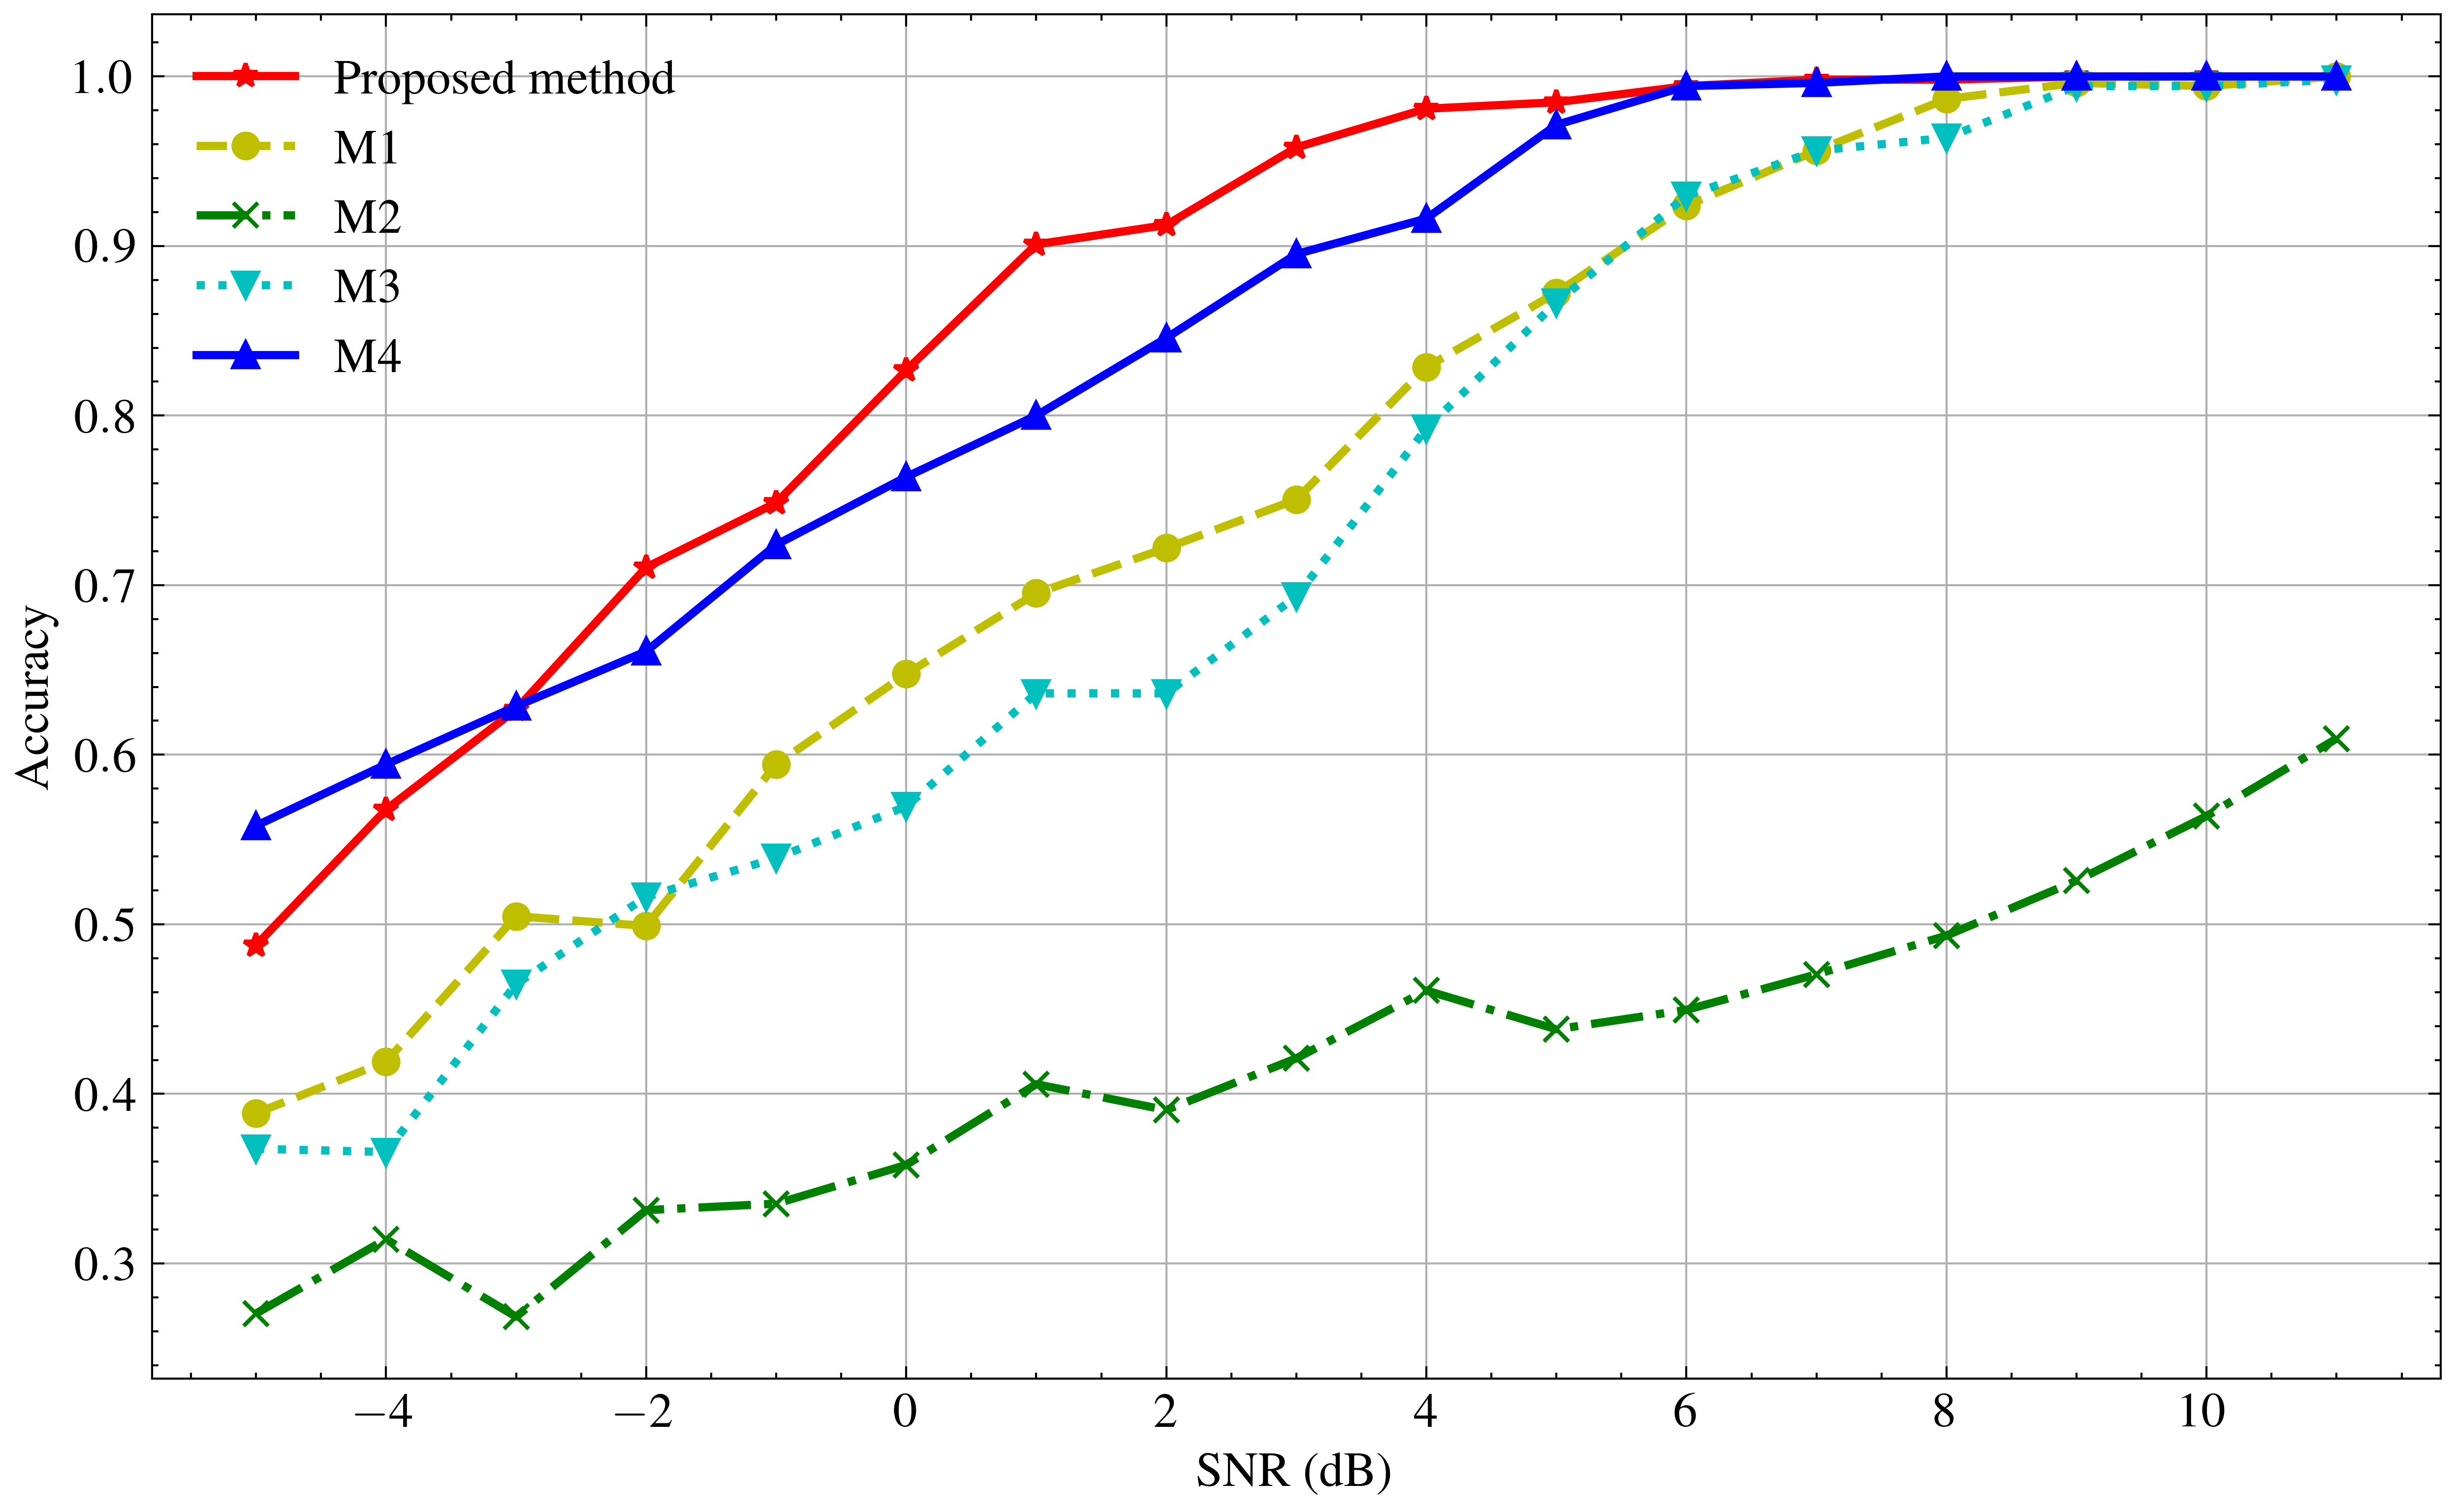

In [6]:
model_dict = {'Proposed method':TSPN,
              'M1':resnet,
              'M2':Sincnet,
              'M3':WKN,
              'M4':MWA}

snr_levels = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
plot_accuracy_vs_snr(test_data = data, test_labels = labels, model_dict = model_dict, snr_levels = snr_levels, plot_dir='./plot')

# attention changing

In [ ]:
from torch.nn import functional as F

## attention解析模型

In [22]:
import torch 
from torch.nn import functional as F
from A10_model_parse import parse_attention,visualize_Attention
from pytorch_lightning import seed_everything
seed_everything(args.seed)
# test_dataloader.dataset.flag = 'test'  #
# test_dataloader.dataset.data_create()
data = test_dataloader.dataset.selected_data
labels = test_dataloader.dataset.selected_labels


Seed set to 17


发现attention 平凡化
遂采用l1norm 

In [9]:
SPattnetion,FE_attnention = parse_attention(data,TSPN)
spa0 = SPattnetion[0]
spa1 = SPattnetion[1]
spa2 = SPattnetion[2]
spa3 = SPattnetion[3]
attention_dict = {
    'spa0':spa0,
    'spa1':spa1,
    'spa2':spa2,
    'spa3':spa3,
    'FE_attnention':FE_attnention
}

In [14]:
def generate_channel_groups(num_features, scale, name):
    """
    Generate channel groups based on the feature names, scale, and name.
    
    Parameters:
    - feature_names: List of feature names.
    - scale: The scale parameter.
    - name: The name parameter to determine the generation rule.
    
    Returns:
    - channel_groups: List of channel groups.
    """

    channel_groups = []

    if "FE" in name:
        # Rule when name does not contain "FE"
        for i in range(num_features):
            group = [i]
            for j in range(1, scale):
                group.append(i + j * num_features)
            channel_groups.append(group)
    else:
        # Rule when name contains "FE"
        for i in range(scale):
            feature_list = []
            for j in range(num_features):
                feature_list.append(j + num_features * i)
            channel_groups.append(feature_list)
    

    
    return channel_groups  

fe_feature_num = generate_channel_groups(13,4,'FE')
sp_feature_num = generate_channel_groups(3,4,'spa')
fe_feature_num,sp_feature_num

([[0, 13, 26, 39],
  [1, 14, 27, 40],
  [2, 15, 28, 41],
  [3, 16, 29, 42],
  [4, 17, 30, 43],
  [5, 18, 31, 44],
  [6, 19, 32, 45],
  [7, 20, 33, 46],
  [8, 21, 34, 47],
  [9, 22, 35, 48],
  [10, 23, 36, 49],
  [11, 24, 37, 50],
  [12, 25, 38, 51]],
 [[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11]])

In [ ]:

for name,attention in attention_dict.items():
    if 'FE' in name:
        channel_groups = generate_channel_groups(13,4,'FE')

    else:
        channel_groups = generate_channel_groups(3,4,'spa')
        
    visualize_Attention(sparse_matrix = attention,
                        labels = labels,
                        channel_groups = channel_groups,
                        path='./plot',
                        name=name)

## test

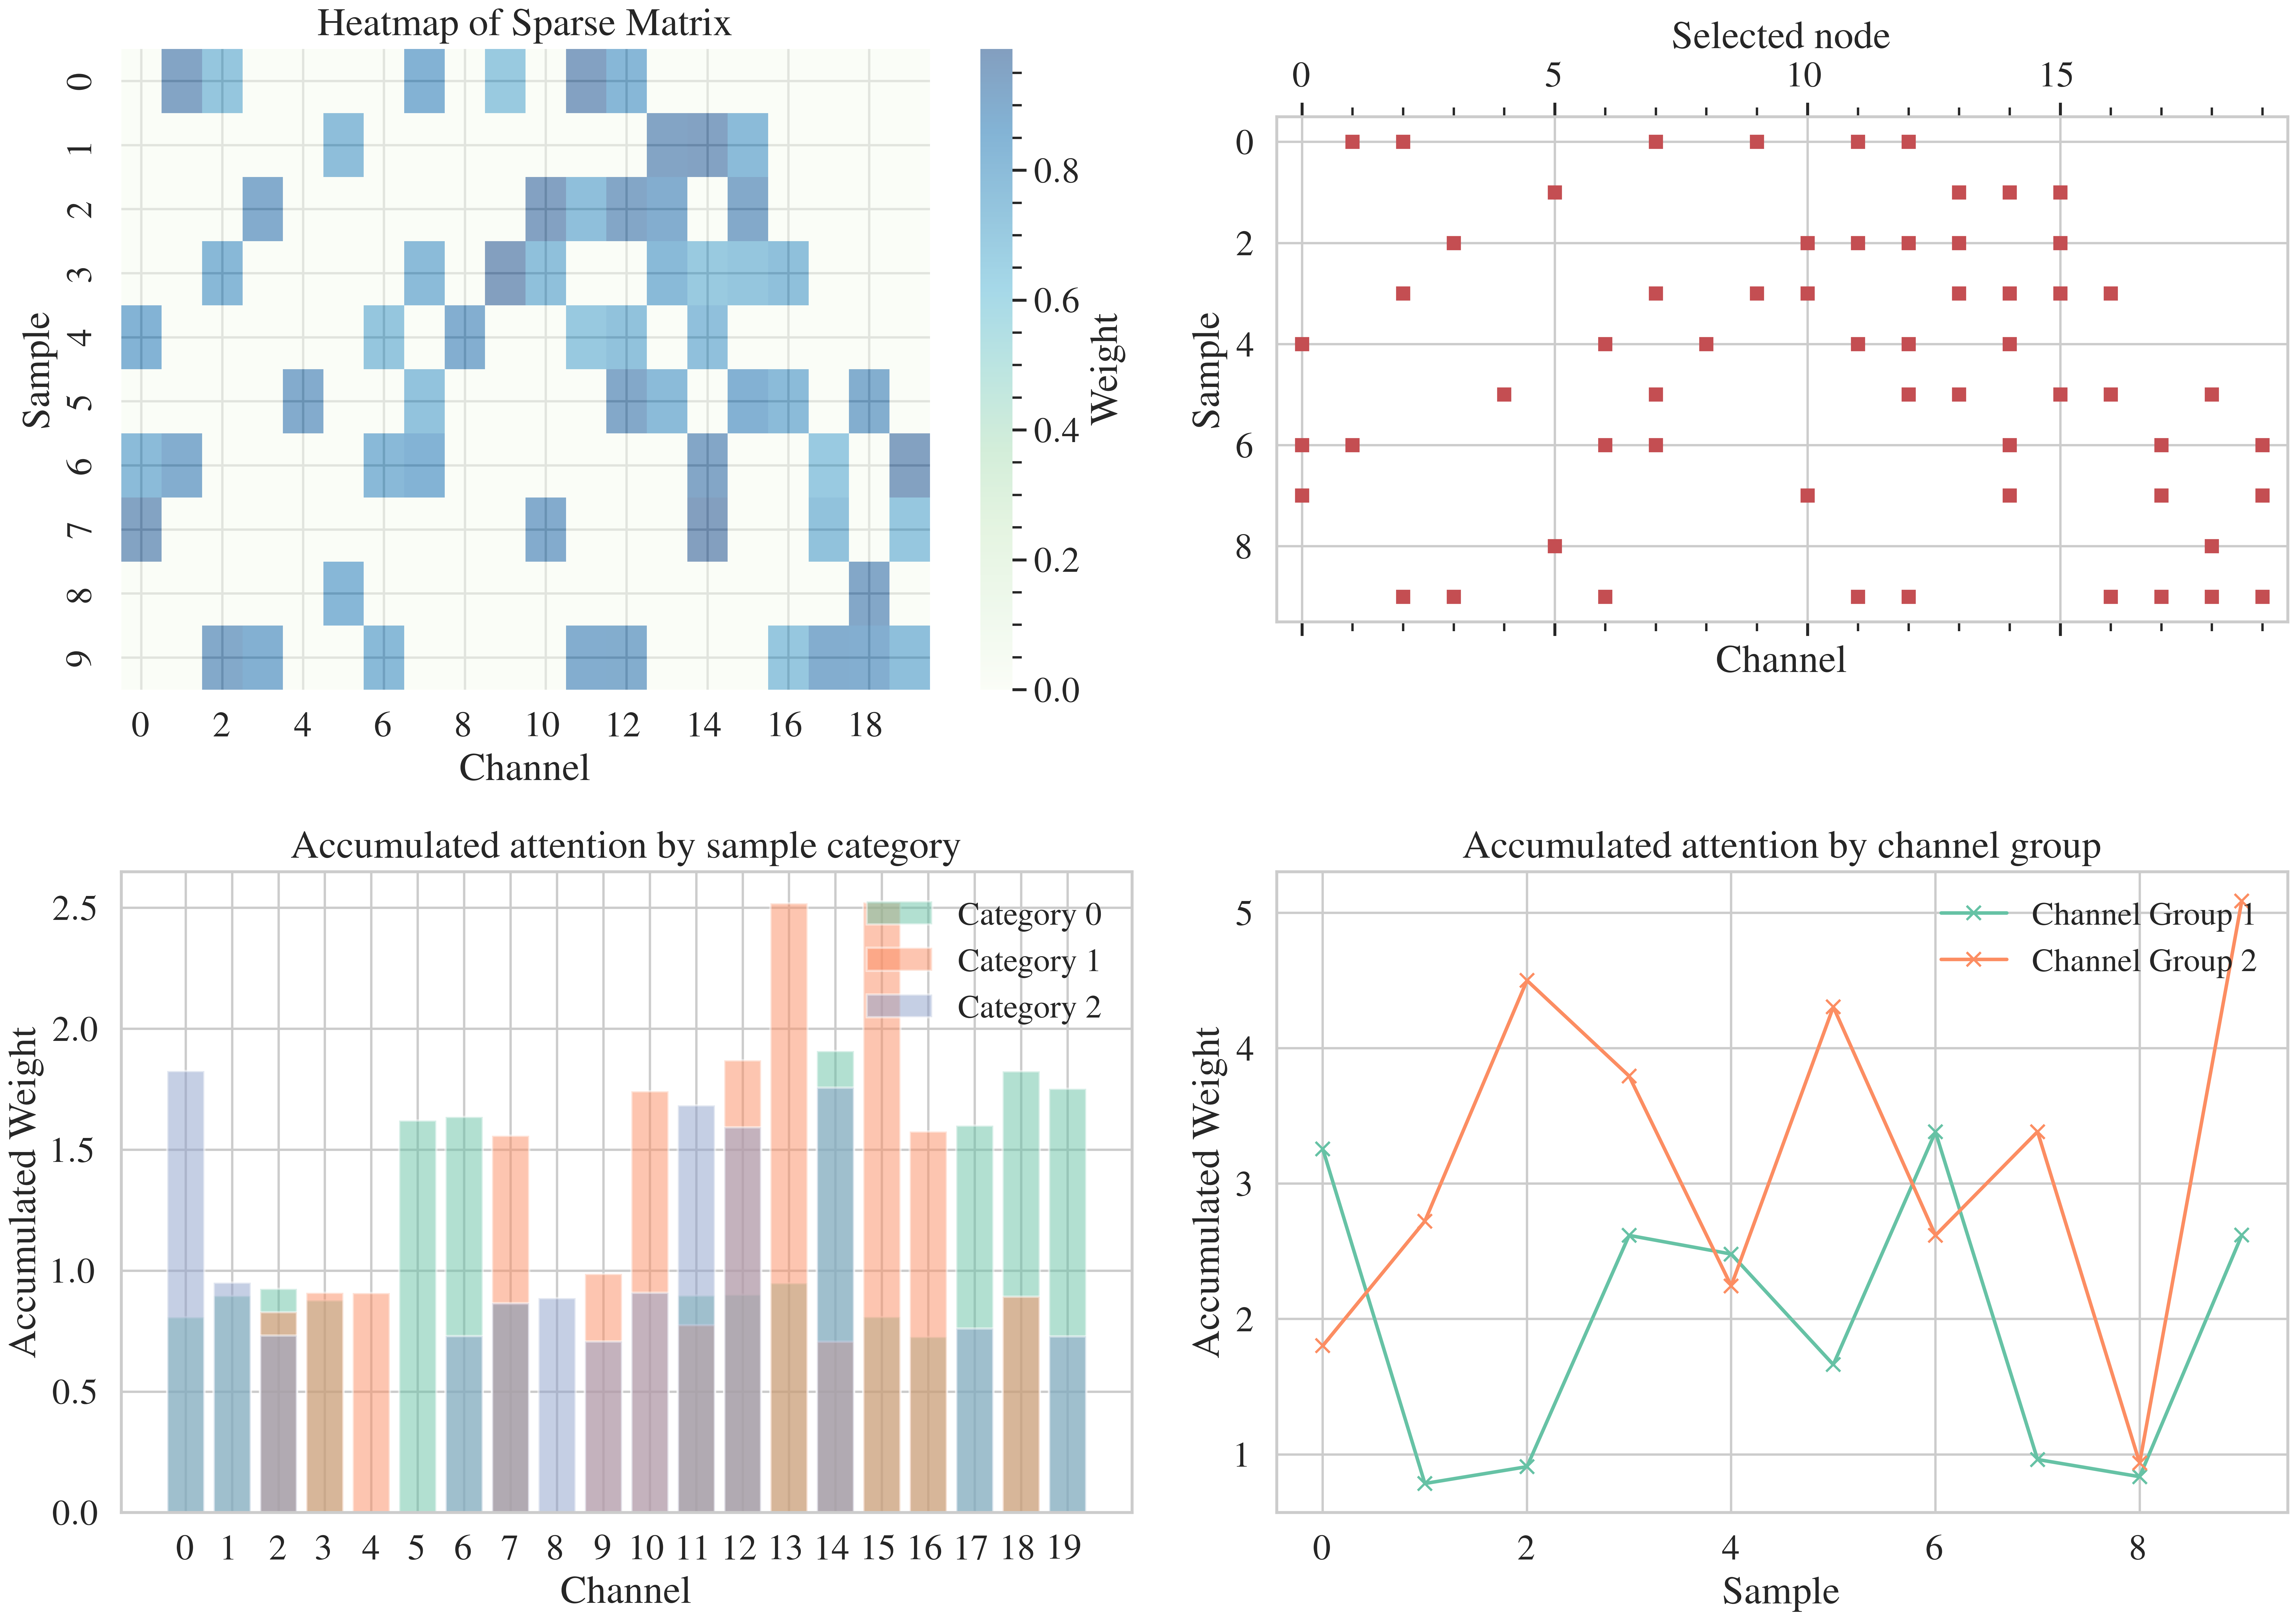

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

plt.rcParams['font.family'] = 'Times New Roman'  # 设置字体为新罗马
# 生成一个稀疏矩阵
b, c = 10, 20  # 样本数和通道数
np.random.seed(42)
sparse_matrix = np.random.rand(b, c)
sparse_matrix[sparse_matrix < 0.7] = 0  # 稀疏化

# 设置类别标签
sample_categories = np.random.choice([0, 1, 2], b)  # 随机分配样本类别
channel_groups = [list(range(0, 10)), list(range(10, 20))]  # 通道类别


# 创建颜色映射
colors = list(mcolors.TABLEAU_COLORS.values())
# color_map = {i: colors[i % len(colors)] for i in range(len(channel_groups[0]))}
# 设置绘图风格
sns.set_theme(style="whitegrid",font='Times New Roman',font_scale=1.4)
sns.set_palette("Set2")
# sns.set(style="whitegrid", context="talk")

# 创建一个大的绘图区域，包含多个子图
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# 第一个子图：热力图
sns.heatmap(sparse_matrix, ax=axs[0, 0], cmap="GnBu", cbar_kws={'label': 'Weight'}, alpha=0.8) # jet cmap="jet",
axs[0, 0].set_title('Heatmap of Sparse Matrix')
axs[0, 0].set_xlabel('Channel')
axs[0, 0].set_ylabel('Sample')

# 第二个子图：矩阵中的非零元素位置
axs[0, 1].spy(sparse_matrix, markersize=5, color='r')
axs[0, 1].set_title('Selected node')
axs[0, 1].grid(True)
axs[0, 1].set_xlabel('Channel')
axs[0, 1].set_ylabel('Sample')

# 第三个子图：根据类别绘制累积的样本权重分布
unique_categories = np.unique(sample_categories)
for category in unique_categories:
    category_mask = (sample_categories == category)
    accumulated_weights = sparse_matrix[category_mask].sum(axis=0)
    # axs[1, 0].plot(accumulated_weights, marker='o', label=f'Category {category}')
    x_positions = range(len(accumulated_weights))  # 生成x轴位置
    axs[1, 0].bar(x_positions, accumulated_weights, label=f'Category {category}', width=0.8,alpha=0.5)  # 使用bar绘制柱状图
axs[1, 0].set_title('Accumulated attention by sample category')
axs[1, 0].set_xlabel('Channel')
axs[1, 0].set_ylabel('Accumulated Weight')
axs[1, 0].grid(True)
axs[1, 0].set_xticks(x_positions)
axs[1, 0].legend(loc='upper right', fontsize='small')

# 第四个子图：根据通道类别绘制累积的权重分布
for group_idx, group in enumerate(channel_groups):
    accumulated_weights = sparse_matrix[:, group].sum(axis=1)
    axs[1, 1].plot(accumulated_weights, marker='x', label=f'Channel Group {group_idx+1}')
axs[1, 1].set_title('Accumulated attention by channel group')
axs[1, 1].set_xlabel('Sample')
axs[1, 1].set_ylabel('Accumulated Weight')
axs[1, 1].grid(True)
axs[1, 1].legend(loc='upper right', fontsize='small')

# 调整布局，使子图不重叠
plt.tight_layout()

# 显示图形
plt.show()


## V2 4个热力图

IndexError: boolean index did not match indexed array along dimension 0; dimension is 525 but corresponding boolean dimension is 100

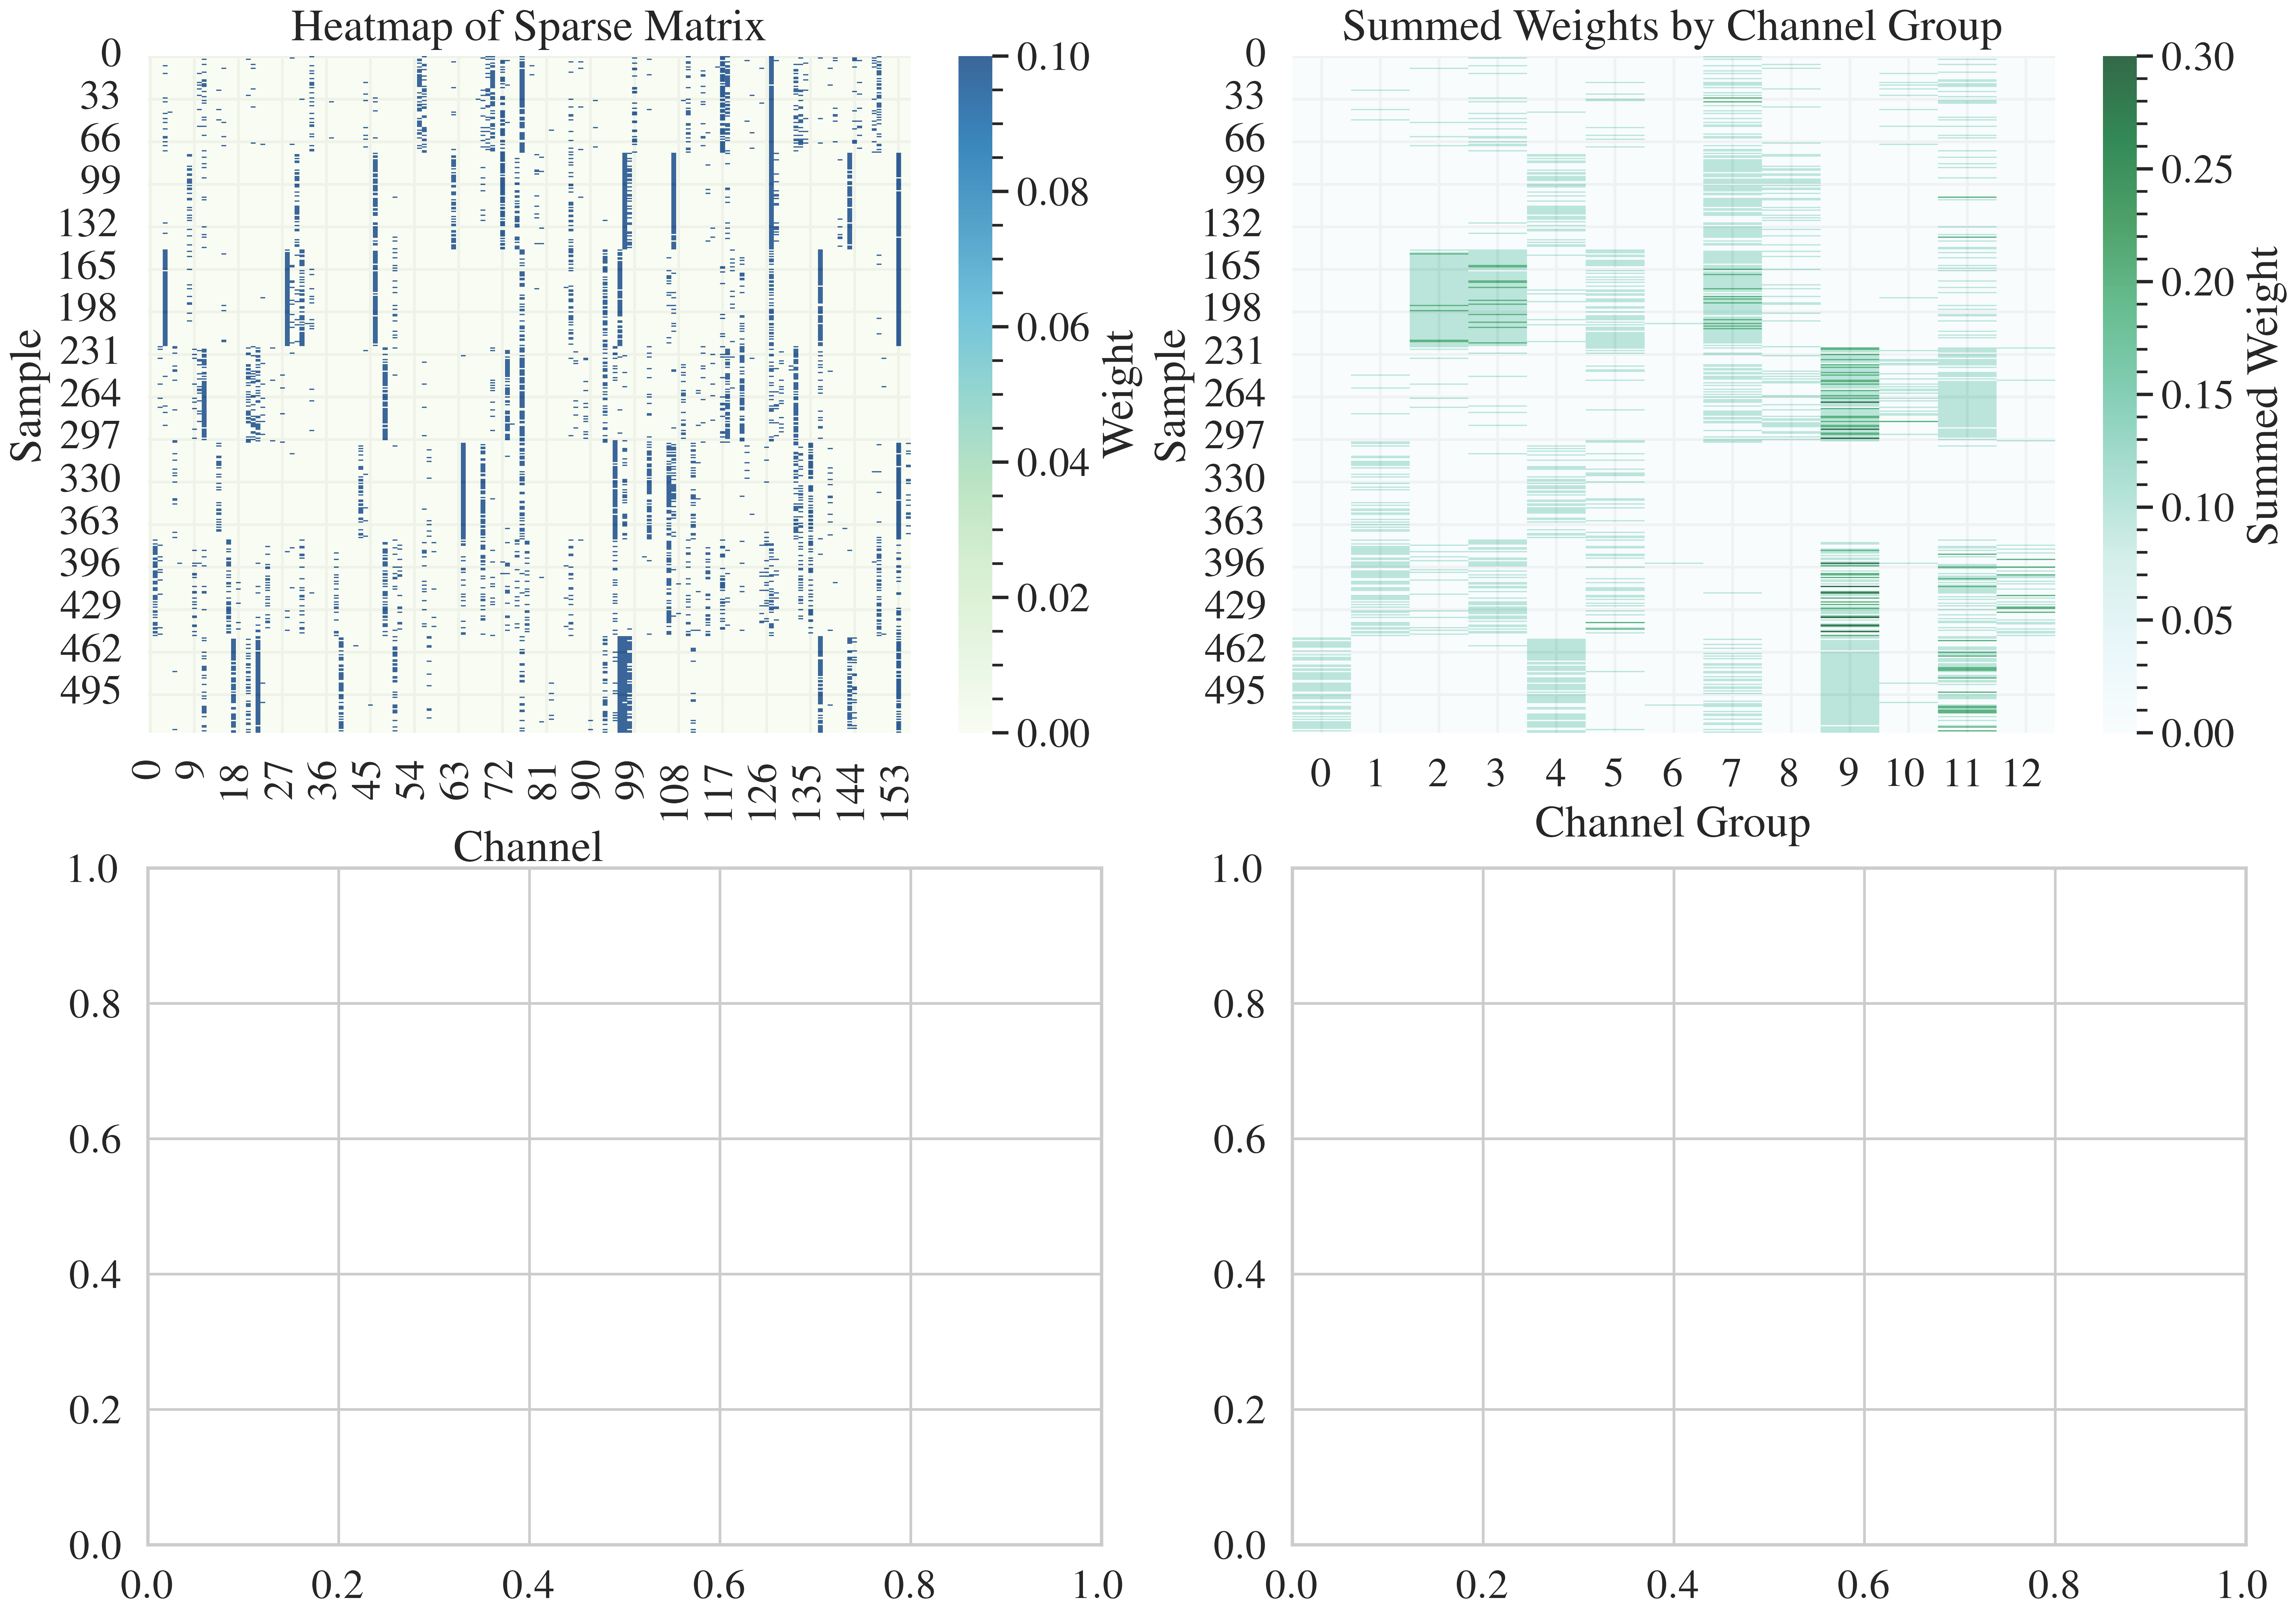

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


visualize_Attention(sparse_matrix = FE_attnention,
                    labels = labels,
                    channel_groups = generate_channel_groups(13,4,'FE'))
# # 仿真数据测试
# a, b = 100, 12  # 100个样本，12个通道
# c = 7  # 7个标签
# sparse_matrix = np.random.rand(a, b)
# labels = np.random.randint(0, c, a)
# channel_groups = [[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11]]

# visualize_Attention(sparse_matrix, labels, channel_groups)


## v3 风格迥异

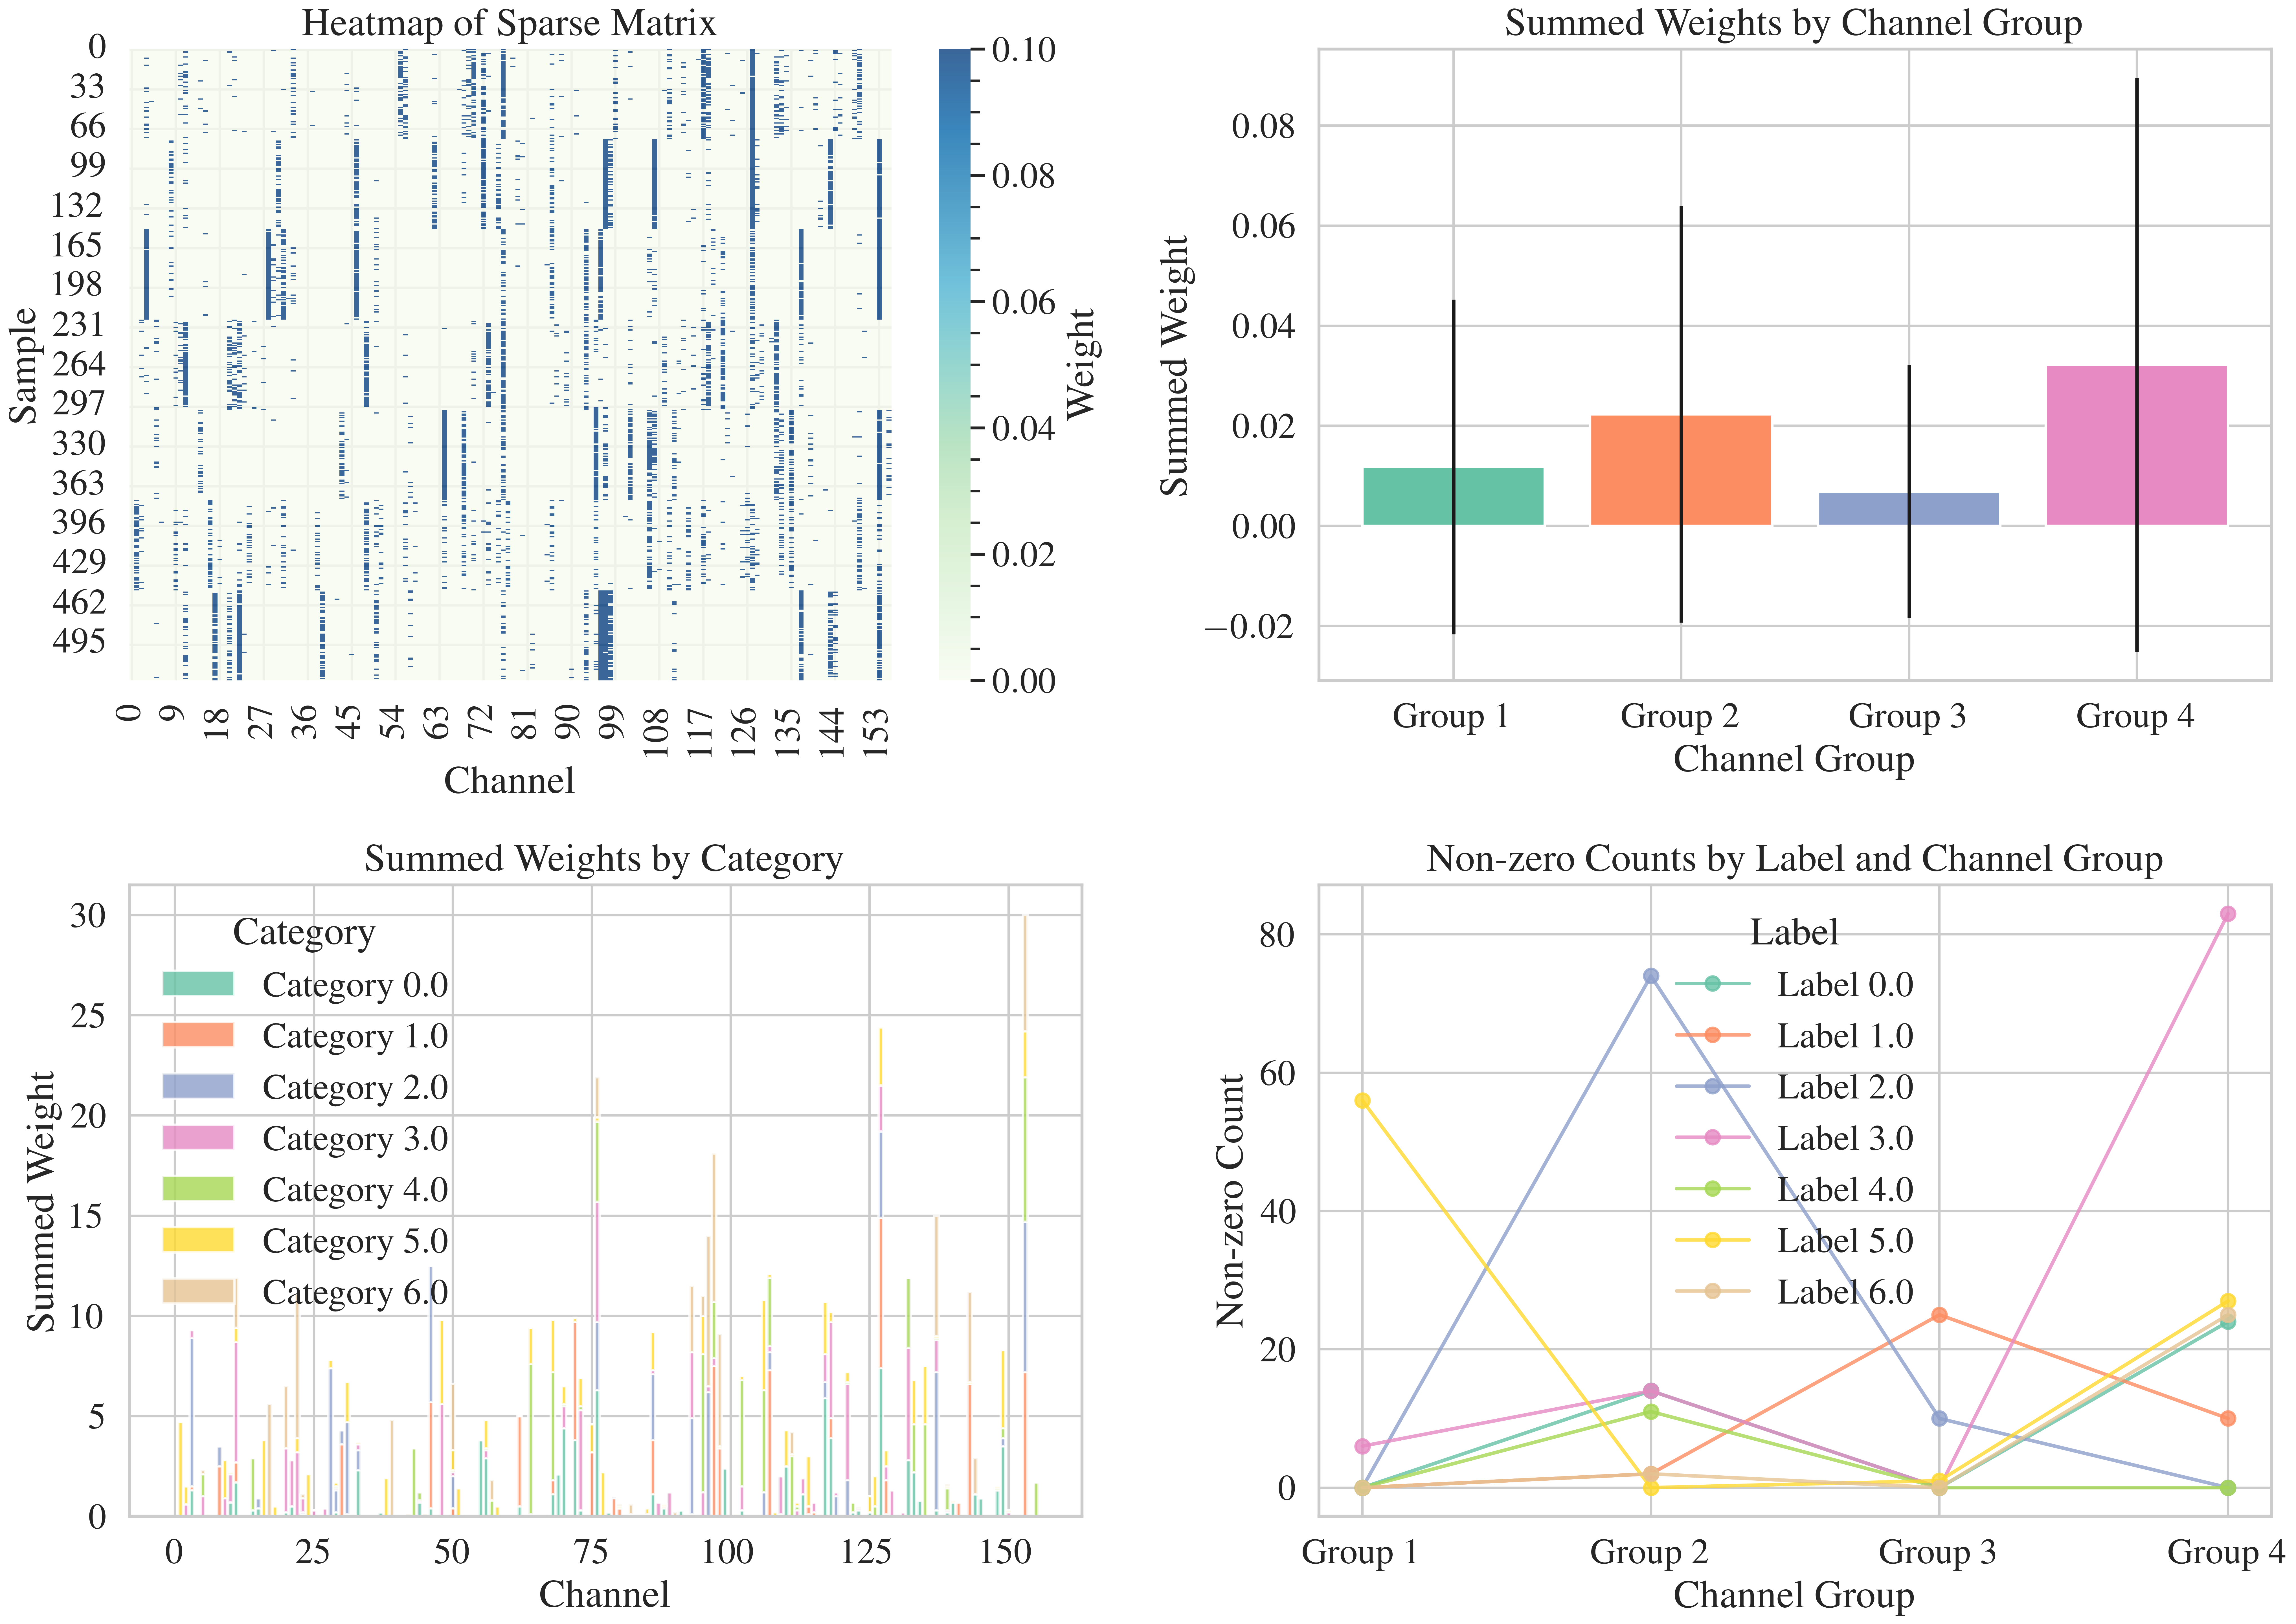

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_Attention(sparse_matrix, labels, channel_groups, path='./plot', name=''):
    plt.rcParams['font.family'] = 'Times New Roman'  # 设置字体为新罗马

    # 设置绘图风格
    sns.set_theme(style="whitegrid", font='Times New Roman', font_scale=1.4)
    sns.set_palette("Set2")

    # 创建一个大的绘图区域，包含多个子图
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))

    # 第一个子图：热力图
    sns.heatmap(sparse_matrix, ax=axs[0, 0], cmap="GnBu", cbar_kws={'label': 'Weight'}, alpha=0.8)  # jet cmap="jet",
    axs[0, 0].set_title('Heatmap of Sparse Matrix')
    axs[0, 0].set_xlabel('Channel')
    axs[0, 0].set_ylabel('Sample')

    # 第二个子图：根据channel_groups的权重求和 - 条形图
    summed_weights = np.array([sparse_matrix[:, group].sum(axis=1) for group in channel_groups]).T
    group_sums_mean = summed_weights.mean(axis=0)
    group_sums_std = summed_weights.std(axis=0)
    axs[0, 1].bar(range(len(channel_groups)), group_sums_mean, yerr=group_sums_std, color=sns.color_palette("Set2", len(channel_groups)))
    axs[0, 1].set_title('Summed Weights by Channel Group')
    axs[0, 1].set_xlabel('Channel Group')
    axs[0, 1].set_ylabel('Summed Weight')
    axs[0, 1].set_xticks(range(len(channel_groups)))
    axs[0, 1].set_xticklabels([f'Group {i+1}' for i in range(len(channel_groups))])

    # 第三个子图：根据类别绘制累积的样本权重分布 - 堆叠条形图
    unique_categories = np.unique(labels)
    category_sums = np.array([sparse_matrix[labels == cat].sum(axis=0) for cat in unique_categories])
    bottom = np.zeros(category_sums.shape[1])
    for cat_idx, cat in enumerate(unique_categories):
        axs[1, 0].bar(range(category_sums.shape[1]), category_sums[cat_idx], bottom=bottom, label=f'Category {cat}', alpha=0.8)
        bottom += category_sums[cat_idx]
    axs[1, 0].set_title('Summed Weights by Category')
    axs[1, 0].set_xlabel('Channel')
    axs[1, 0].set_ylabel('Summed Weight')
    axs[1, 0].legend(title='Category')

    # 第四个子图：标签和通道种类的非零元素数量分布 - 点图
    label_channel_group_counts = np.zeros((len(unique_categories), len(channel_groups)))
    for label_idx, label in enumerate(unique_categories):
        label_samples = sparse_matrix[labels == label]
        for group_idx, group in enumerate(channel_groups):
            label_channel_group_counts[label_idx, group_idx] = np.count_nonzero(label_samples[:, group])
    for label_idx, label in enumerate(unique_categories):
        axs[1, 1].plot(range(len(channel_groups)), label_channel_group_counts[label_idx], 'o-', label=f'Label {label}', alpha=0.8)
    axs[1, 1].set_title('Non-zero Counts by Label and Channel Group')
    axs[1, 1].set_xlabel('Channel Group')
    axs[1, 1].set_ylabel('Non-zero Count')
    axs[1, 1].set_xticks(range(len(channel_groups)))
    axs[1, 1].set_xticklabels([f'Group {i+1}' for i in range(len(channel_groups))])
    axs[1, 1].legend(title='Label')

    # 调整布局，使子图不重叠
    plt.tight_layout()

    # # 显示图形
    # plt.savefig(path + f'/Attention{name}.pdf', dpi=256)  # 保存为PDF
    # plt.savefig(path + f'/Attention{name}.svg', dpi=256)
    plt.show()

# # 仿真数据测试
# a, b = 100, 12  # 100个样本，12个通道
# c = 7  # 7个标签
# sparse_matrix = np.random.rand(a, b)
# labels = np.random.randint(0, c, a)
# channel_groups = [[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11]]

visualize_Attention(FE_attnention, labels, channel_groups)
